# Case Loft

Objetivo da Gerência: ter um corretor envolvido em todos os processos de venda.
A Gerência acredeita que isso tornará o processo mais escalável e melhorará a experiência do cliente. Logo, eles querem que todos os **leads diretos** sejam obirgatoriamente atendidos por um corretor.

Objetivo do Projeto:
Apresentar à liderança da área de relacionamento com o Canal um plano de como distribuir leads diretos entre os corretores da nossa base.

Key-drivers:
1. Dimensionamento
2. Distribuição
3. Próximos Passos

Minhas hipóteses:
1. É melhor dar mais leads para os corretores que convertem mais leads em vendas.
2. É melhor dar mais leads para os corretores que vendem mais.

-----


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Exploração

In [2]:
df_leads = pd.read_csv(r'/Users/leuzinger/Dropbox/Data Science/Case Loft/Cópia de crm_leads_registration - Sheet1.csv')

In [3]:
df_leads.head()

,email,lead_id,lead_captured_date,lead_type,contact_type,business_type
0,amanda.silva@email.com.br,00Q4P00000wkw5kUAA,2019-12-23 16:12:35,Direto,Comprador,Cliente Direto
1,emilly.gomes@email.com.br,00Q4P00000wkxAqUAI,2019-12-26 12:00:53,Direto,Comprador,Cliente Direto
2,luiza.araujo@email.com.br,00Q4P00000wl1UJUAY,2020-01-03 11:40:38,Direto,Comprador,Cliente Direto
3,lucas.cavalcanti@email.com.br,00Q4P00000wl5ZjUAI,2020-01-07 9:41:50,Direto,Comprador,Cliente Direto
4,lara.gomes@email.com.br,00Q4P00000wl6FNUAY,2020-01-07 13:40:46,Direto,Comprador,Cliente Direto


In [4]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38104 entries, 0 to 38103
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   email               38104 non-null  object
 1   lead_id             38104 non-null  object
 2   lead_captured_date  38104 non-null  object
 3   lead_type           38104 non-null  object
 4   contact_type        38104 non-null  object
 5   business_type       38104 non-null  object
dtypes: object(6)
memory usage: 1.7+ MB


In [5]:
df_leads.nunique()

email                  3867
lead_id               38101
lead_captured_date    37987
lead_type                 2
contact_type              2
business_type            12
dtype: int64

In [6]:
df_leads['lead_captured_date'] = pd.to_datetime(df_leads['lead_captured_date'])

In [7]:
df_leads['leads_date'] = df_leads['lead_captured_date'].dt.date

In [8]:
df_leads['lead_captured_date'].max()

Timestamp('2020-04-28 18:50:13')

In [9]:
df_leads['lead_captured_date'].dt.date.value_counts()

2020-04-06    770
2020-02-11    475
2020-02-12    462
2020-03-02    434
2020-02-17    419
             ... 
2018-09-18      1
2019-08-04      1
2018-11-02      1
2018-11-06      1
2018-07-06      1
Name: lead_captured_date, Length: 568, dtype: int64

In [10]:
df_leads.duplicated().sum()

3

In [11]:
#df_leads.loc[df_leads.duplicated(), :]

In [12]:
df_leads = df_leads.drop_duplicates()
df_leads.duplicated().sum()

0

In [13]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38101 entries, 0 to 38103
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   email               38101 non-null  object        
 1   lead_id             38101 non-null  object        
 2   lead_captured_date  38101 non-null  datetime64[ns]
 3   lead_type           38101 non-null  object        
 4   contact_type        38101 non-null  object        
 5   business_type       38101 non-null  object        
 6   leads_date          38101 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 2.3+ MB


In [14]:
df_leads[df_leads['lead_type'] == 'Direto'].count()

email                 31376
lead_id               31376
lead_captured_date    31376
lead_type             31376
contact_type          31376
business_type         31376
leads_date            31376
dtype: int64

In [378]:
months = df_leads['lead_captured_date'].dt.to_period('M').value_counts(sort=False).to_frame().reset_index()[:-1]
months['index'] = months['index'].astype(str)

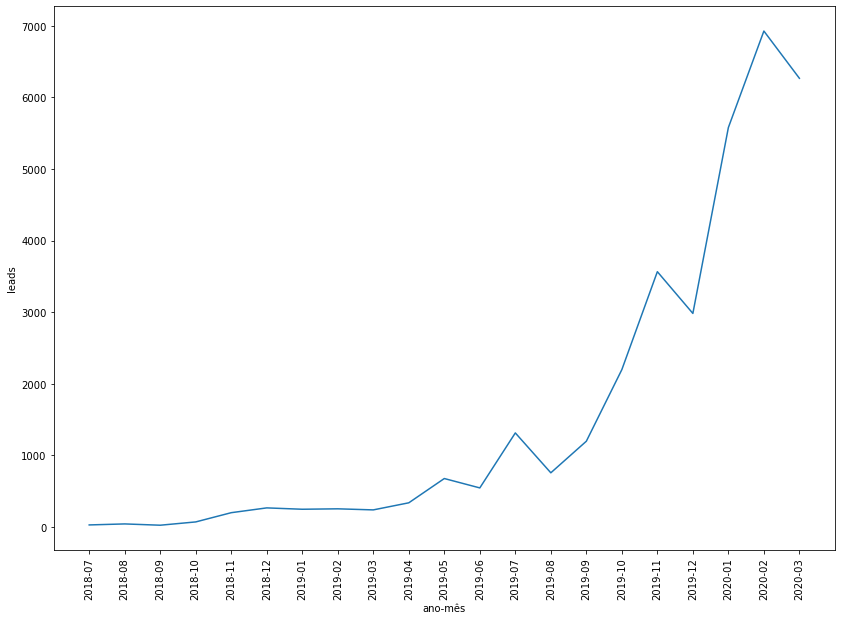

In [391]:
plt.figure(figsize=(14,10))
g = sns.lineplot(data=months,x='index',y='lead_captured_date')
#h = sns.lineplot(data=df_leads['lead_captured_date'].dt.date.value_counts())
plt.xticks(rotation=90)
plt.ylabel('leads')
plt.xlabel('ano-mês')
plt.show()

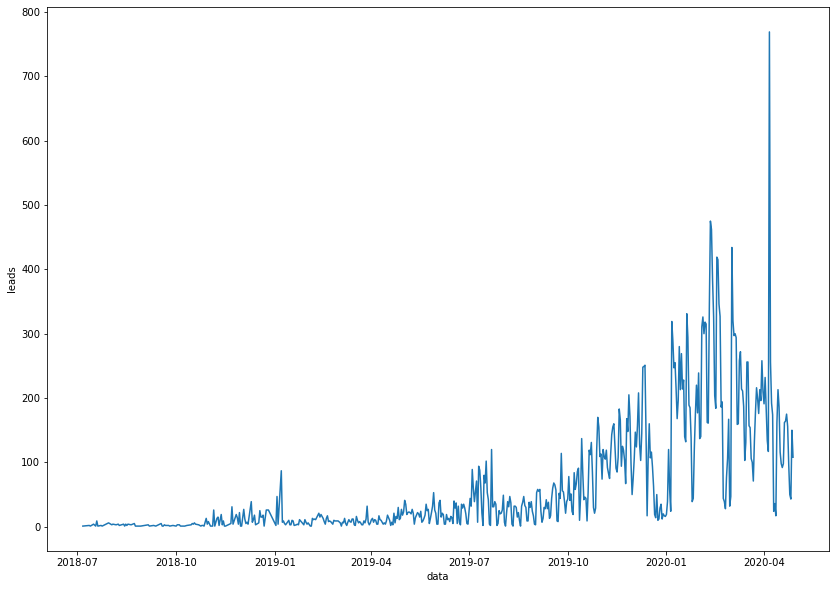

In [390]:
plt.figure(figsize=(14,10))
g = sns.lineplot(data=df_leads['lead_captured_date'].dt.date.value_counts())
plt.ylabel('leads')
plt.xlabel('data')
plt.show()

In [18]:
df_sales = pd.read_csv(r'/Users/leuzinger/Dropbox/Data Science/Case Loft/Cópia de crm_sales - Sheet1.csv')

In [19]:
df_sales.head()

,lead_id,sold_date
0,00Q4P00000wlPcPUAU,2020-01-20
1,00Q4P00000wlcQ4UAI,2020-01-23
2,00Q4P000010OAtBUAW,2020-04-01
3,00Q4P000010MfjQUAS,2020-03-10
4,4260,2019-06-07


In [20]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   lead_id    285 non-null    object
 1   sold_date  285 non-null    object
dtypes: object(2)
memory usage: 4.6+ KB


In [21]:
df_sales['sold_date'] = pd.to_datetime(df_sales['sold_date'])

In [22]:
df_sales.duplicated().sum()

0

In [381]:
months1 = df_sales['sold_date'].dt.to_period('M').value_counts(sort=False).to_frame().reset_index()[:-1]
months1['index'] = months1['index'].astype(str)

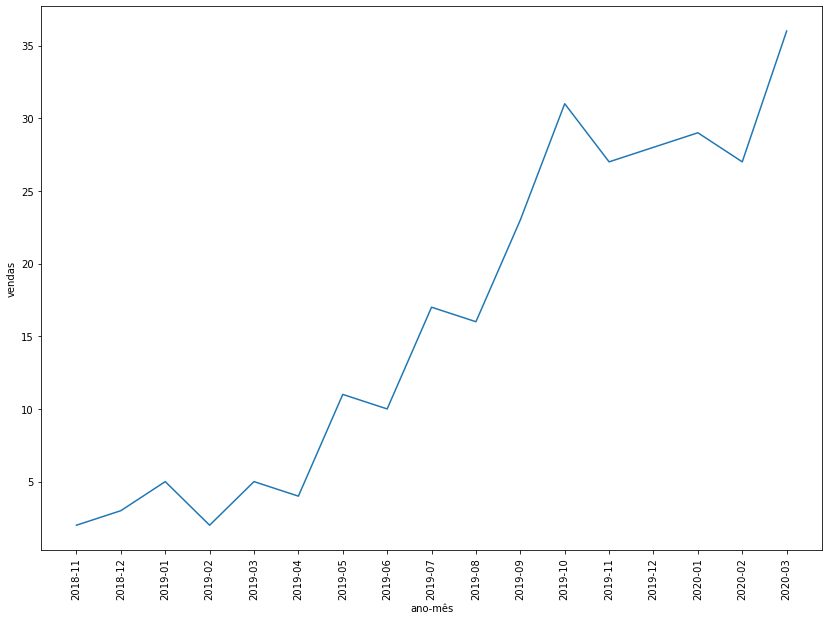

In [392]:
plt.figure(figsize=(14,10))
g = sns.lineplot(data=months1,x='index',y='sold_date')
plt.xticks(rotation=90)
plt.ylabel('vendas')
plt.xlabel('ano-mês')
plt.show()

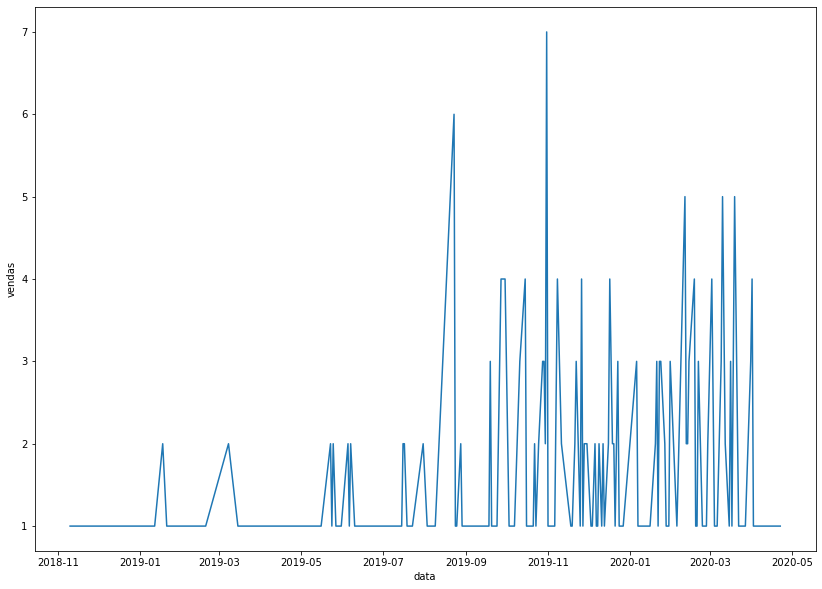

In [389]:
plt.figure(figsize=(14,10))
g = sns.lineplot(data=df_sales['sold_date'].value_counts())
plt.ylabel('vendas')
plt.xlabel('data')
plt.show()

In [26]:
df_visits = pd.read_csv(r'/Users/leuzinger/Dropbox/Data Science/Case Loft/Cópia de crm_visits - Sheet1.csv')

In [27]:
df_visits.head()

,lead_id,visit_date
0,11206,2019-10-07
1,11834,2019-10-15
2,11845,2019-10-14
3,12604,2019-10-26
4,13520,2019-11-01


In [28]:
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7487 entries, 0 to 7486
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lead_id     7487 non-null   object
 1   visit_date  7487 non-null   object
dtypes: object(2)
memory usage: 117.1+ KB


In [29]:
df_visits['visit_date'] = pd.to_datetime(df_visits['visit_date'])

In [30]:
df_visits.duplicated().sum()

135

In [31]:
df_visits = df_visits.drop_duplicates()
df_visits.duplicated().sum()

0

In [435]:
months2 = df_visits['visit_date'].dt.to_period('M').value_counts(sort=False).to_frame().reset_index()[:-1]
months2['index'] = months2['index'].astype(str)
months2 = months2.sort_values(by=['index']).reset_index(drop=True)

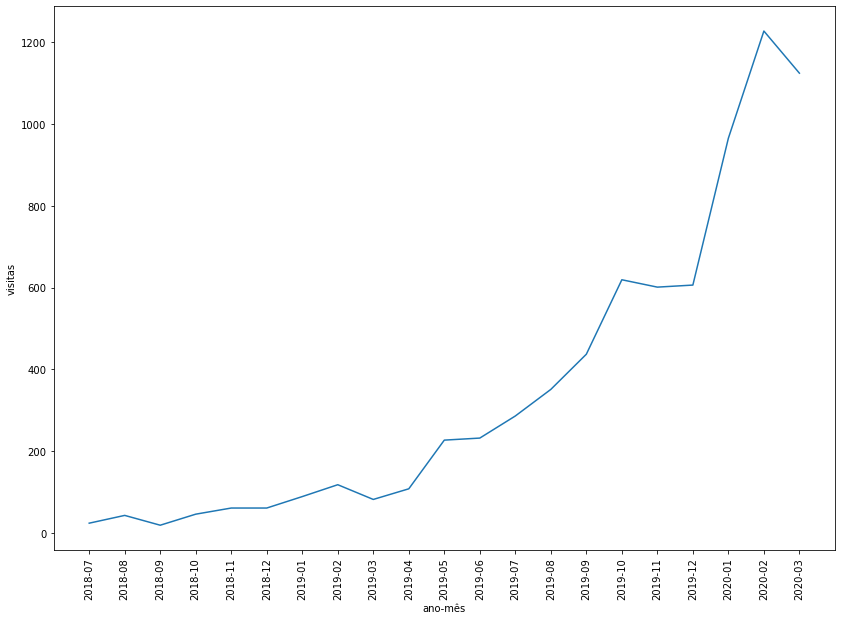

In [514]:
plt.figure(figsize=(14,10))
g = sns.lineplot(data=months2,x='index',y='visit_date')
plt.xticks(rotation=90)
plt.ylabel('visitas')
plt.xlabel('ano-mês')
plt.show()

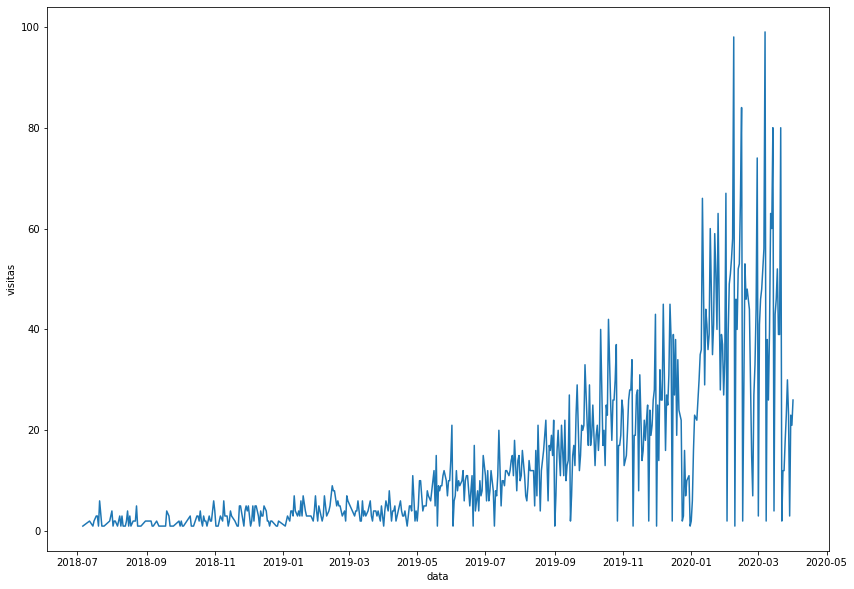

In [388]:
plt.figure(figsize=(14,10))
g = sns.lineplot(data=df_visits['visit_date'].value_counts())
plt.ylabel('visitas')
plt.xlabel('data')
plt.show()

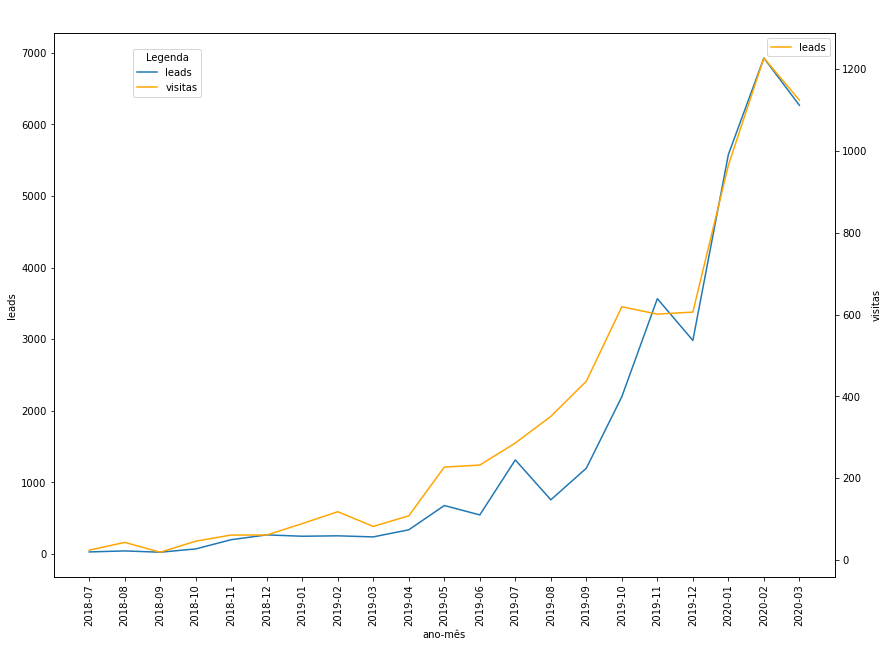

In [503]:
plt.figure(figsize=(14,10))
ax1 = sns.lineplot(data=months,x='index',y='lead_captured_date')
plt.xlabel('ano-mês')
plt.xticks(ticks=months['index'],rotation=90)
ax2 = ax1.twinx()
ax2 = sns.lineplot(data=months2,x='index',y='visit_date',color='orange')
ax1.set_ylabel('leads')
ax2.set_ylabel('visitas')
plt.legend(['leads','visitas'])


labels=['leads','visitas']
plt.gcf().legend(labels,title="Legenda",loc=(0.15,0.85)) 

plt.show()

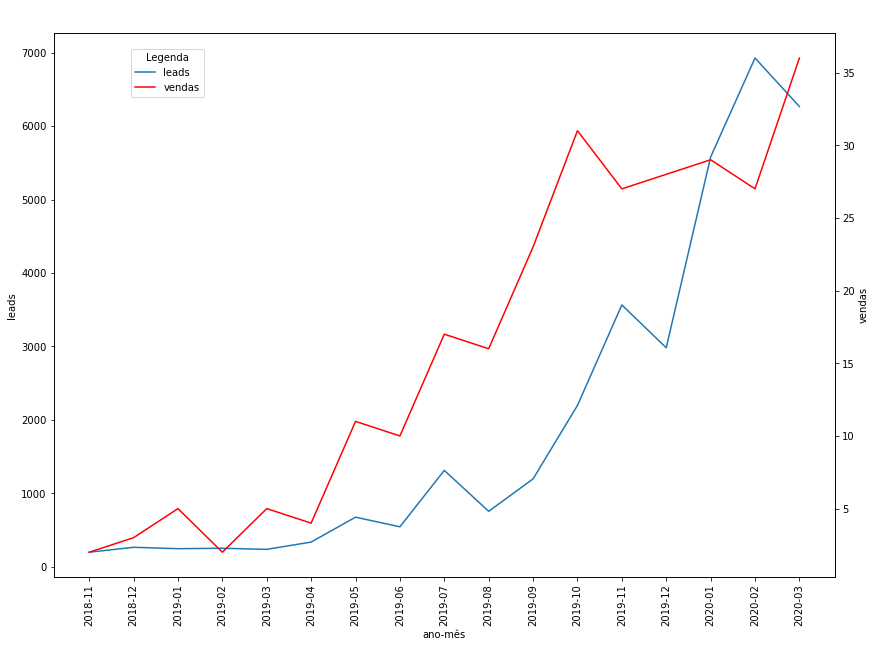

In [501]:
plt.figure(figsize=(14,10))

ax1 = sns.lineplot(data=months[4:],x='index',y='lead_captured_date')
plt.xlabel('ano-mês')
plt.xticks(ticks=months['index'],rotation=90)
ax2 = ax1.twinx()
ax2 = sns.lineplot(data=months1,x='index',y='sold_date',color='red')
ax1.set_ylabel('leads')
ax2.set_ylabel('vendas')

labels=['leads','vendas']
plt.gcf().legend(labels,title="Legenda",loc=(0.15,0.85)) 

plt.show()

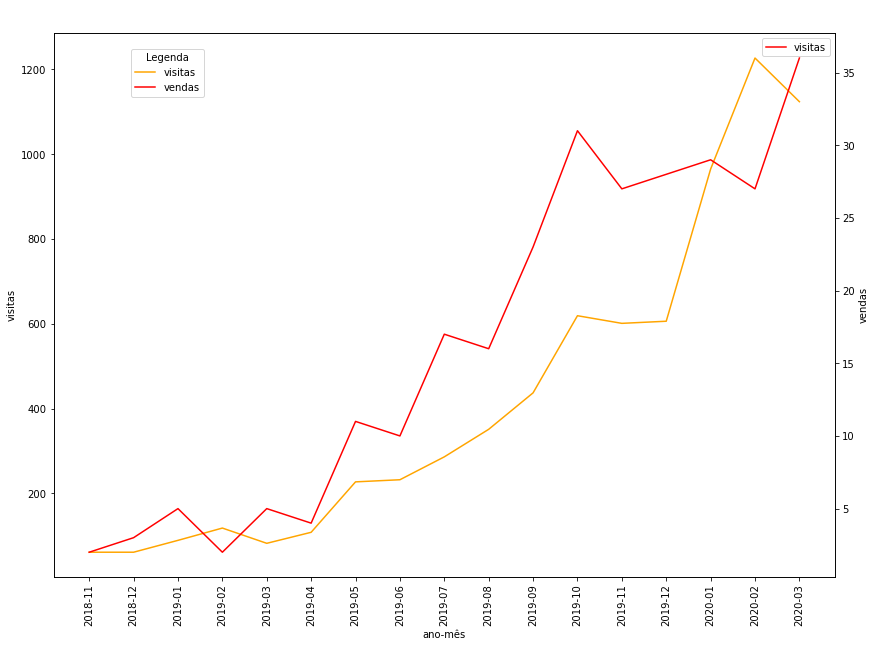

In [504]:
plt.figure(figsize=(14,10))
ax1 = sns.lineplot(data=months2[4:],x='index',y='visit_date',color='orange')
plt.xlabel('ano-mês')
plt.xticks(ticks=months2['index'],rotation=90)
ax2 = ax1.twinx()
ax2 = sns.lineplot(data=months1,x='index',y='sold_date',color='red')
ax1.set_ylabel('visitas')
ax2.set_ylabel('vendas')
plt.legend(['visitas','vendas'])

labels=['visitas','vendas']
plt.gcf().legend(labels,title="Legenda",loc=(0.15,0.85)) 

plt.show()

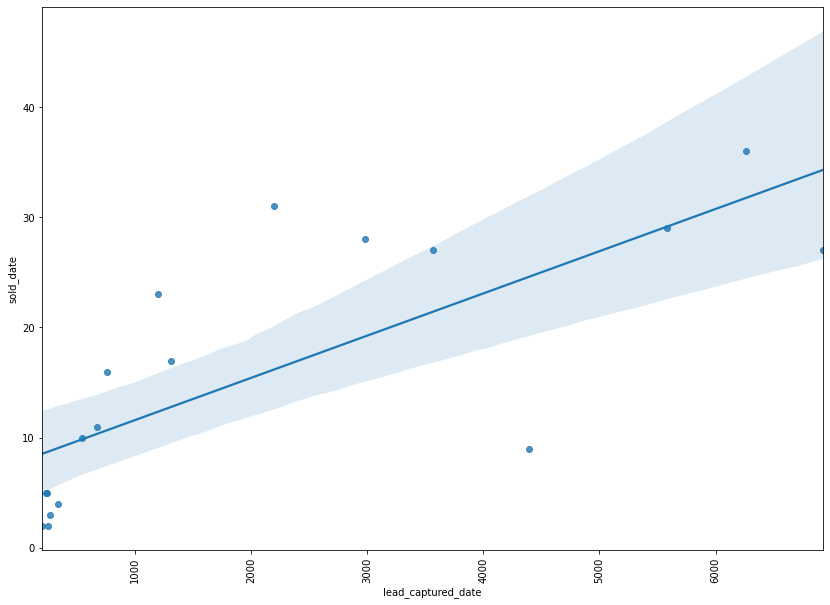

In [36]:
plt.figure(figsize=(14,10))
g = sns.regplot(x=months[4:].lead_captured_date,y=months1.sold_date,)
plt.xticks(rotation=90)
plt.show()

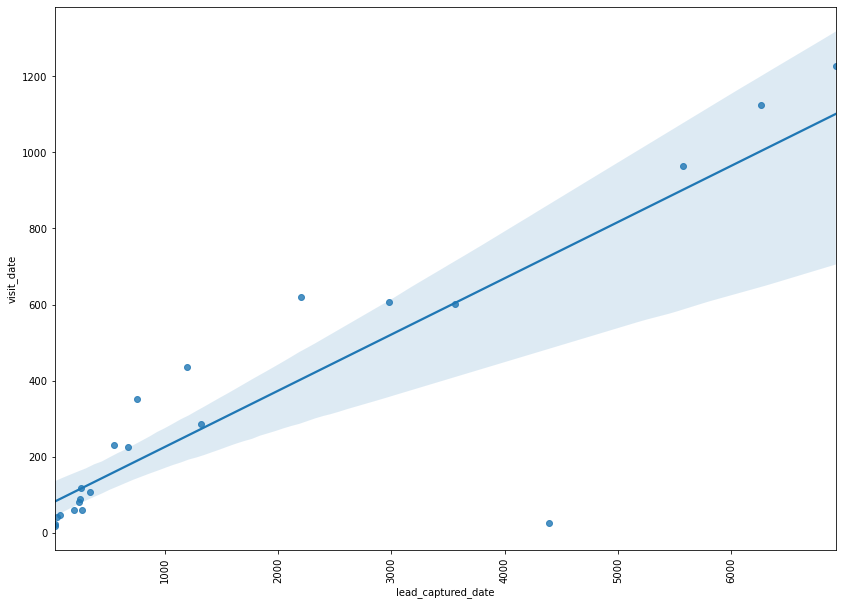

In [37]:
plt.figure(figsize=(14,10))
g = sns.regplot(x=months.lead_captured_date,y=months2.visit_date)
plt.xticks(rotation=90)
plt.show()

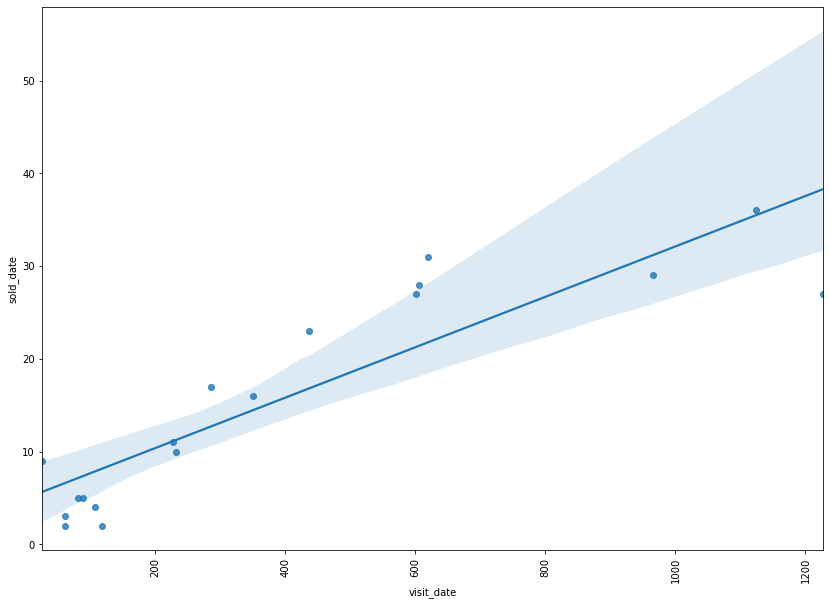

In [38]:
plt.figure(figsize=(14,10))
g = sns.regplot(x=months2[4:].visit_date,y=months1.sold_date)
plt.xticks(rotation=90)
plt.show()

-----

Verifica-se que há forte relação direta entre:

1. leads e visitas
2. leads e vendas
3. visitas e vendas

--------

# Leads, visitas e vendas mensais

In [42]:
df = df_leads.join(df_visits.set_index('lead_id'),on='lead_id')
df = df.join(df_sales.set_index('lead_id'),on='lead_id')
df

,email,lead_id,lead_captured_date,lead_type,contact_type,business_type,leads_date,visit_date,sold_date
0,amanda.silva@email.com.br,00Q4P00000wkw5kUAA,2019-12-23 16:12:35,Direto,Comprador,Cliente Direto,2019-12-23,NaT,NaT
1,emilly.gomes@email.com.br,00Q4P00000wkxAqUAI,2019-12-26 12:00:53,Direto,Comprador,Cliente Direto,2019-12-26,2020-01-11,NaT
2,luiza.araujo@email.com.br,00Q4P00000wl1UJUAY,2020-01-03 11:40:38,Direto,Comprador,Cliente Direto,2020-01-03,2020-01-14,NaT
3,lucas.cavalcanti@email.com.br,00Q4P00000wl5ZjUAI,2020-01-07 09:41:50,Direto,Comprador,Cliente Direto,2020-01-07,NaT,NaT
4,lara.gomes@email.com.br,00Q4P00000wl6FNUAY,2020-01-07 13:40:46,Direto,Comprador,Cliente Direto,2020-01-07,NaT,NaT
...,...,...,...,...,...,...,...,...,...
38099,emilly.oliveira@email.com.br,859,2018-12-19 18:35:31,Direto,Comprador,Cliente Direto,2018-12-19,NaT,NaT
38100,guilherme.pinto@email.com.br,9277,2019-09-13 10:08:43,Direto,Comprador,Permuta Direto,2019-09-13,NaT,NaT
38101,thiago.silva@email.com.br,9287,2019-09-13 11:14:24,Indireto,Corretor,MGM,2019-09-13,2019-09-15,2019-10-31
38102,ana.martins@email.com.br,9826,2019-09-19 18:53:01,Direto,Comprador,Cliente Direto,2019-09-19,2019-11-02,NaT


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38101 entries, 0 to 38103
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   email               38101 non-null  object        
 1   lead_id             38101 non-null  object        
 2   lead_captured_date  38101 non-null  datetime64[ns]
 3   lead_type           38101 non-null  object        
 4   contact_type        38101 non-null  object        
 5   business_type       38101 non-null  object        
 6   leads_date          38101 non-null  object        
 7   visit_date          7352 non-null   datetime64[ns]
 8   sold_date           285 non-null    datetime64[ns]
dtypes: datetime64[ns](3), object(6)
memory usage: 2.9+ MB


In [44]:
visit = df[['email','lead_type','contact_type','business_type','visit_date']]
visit = visit.dropna()
visit['ano'] = visit['visit_date'].dt.year.astype(str)
visit['mês'] = visit['visit_date'].dt.month.astype(str)
visit['mês'] = visit['mês'].apply(lambda x: '{0:0>2}'.format(x))
visit['ano-mês'] = visit['ano']+'-'+visit['mês']
visit

,email,lead_type,contact_type,business_type,visit_date,ano,mês,ano-mês
1,emilly.gomes@email.com.br,Direto,Comprador,Cliente Direto,2020-01-11,2020,01,2020-01
2,luiza.araujo@email.com.br,Direto,Comprador,Cliente Direto,2020-01-14,2020,01,2020-01
5,eduardo.correia@email.com.br,Direto,Comprador,Cliente Direto,2020-01-13,2020,01,2020-01
9,mateus.azevedo@email.com.br,Direto,Comprador,Cliente Direto,2020-01-17,2020,01,2020-01
18,erick.goncalves@email.com.br,Direto,Comprador,Cliente Direto,2020-01-20,2020,01,2020-01
...,...,...,...,...,...,...,...,...
38093,antônio.martins@email.com.br,Indireto,Corretor,Imobiliária Pequena,2019-07-13,2019,07,2019-07
38095,otávio.correia@email.com.br,Direto,Comprador,Cliente Direto,2019-07-16,2019,07,2019-07
38098,joão.rocha@email.com.br,Indireto,Corretor,Imobiliária Pequena,2018-12-13,2018,12,2018-12
38101,thiago.silva@email.com.br,Indireto,Corretor,MGM,2019-09-15,2019,09,2019-09


In [45]:
#quantidade de visitas por mês por corretor em um único mês. Corretor que fez mais visitas em um único mês fez 10 visitas
visit[visit.lead_type == 'Indireto'].groupby(['email','ano','mês']).count()['visit_date'].value_counts()

1     3022
2      326
3       64
4       21
5        8
7        4
6        3
8        1
10       1
9        1
Name: visit_date, dtype: int64

In [46]:
#Corretor que fez mais visitas em um único mês (10 visitas)

visit[visit.lead_type == 'Indireto'].groupby(['email','ano','mês']).count()['visit_date'][visit[visit.lead_type == 'Indireto'].groupby(['email','ano','mês']).count()['visit_date'] == 10]

email                           ano   mês
manuela.goncalves@email.com.br  2019  10     10
Name: visit_date, dtype: int64

In [47]:
#Visitas por corretor em todo o período analisado
visit[visit.lead_type == 'Indireto'].groupby(['email']).count()['visit_date'].value_counts()

1     1079
2      395
3      188
4       94
5       56
6       28
7       20
8       17
9       11
10      10
12       7
11       5
14       3
13       2
15       1
16       1
19       1
21       1
26       1
27       1
Name: visit_date, dtype: int64

In [48]:
#Corretor que fez mais visitas no período (27 visitas)
visit[visit.lead_type == 'Indireto'].groupby(['email']).count()['visit_date'][visit[visit.lead_type == 'Indireto'].groupby(['email']).count()['visit_date'] ==27]

email
murilo.goncalves@email.com.br    27
Name: visit_date, dtype: int64

In [49]:
#Corretores que fizeram mais de 4 visitas no período analisado

index = visit[visit.lead_type == 'Indireto'].groupby(['email']).count()['visit_date'][visit[visit.lead_type == 'Indireto'].groupby(['email']).count()['visit_date'] >=4].index

In [50]:
index

Index(['alex.rodrigues@email.com.br', 'alice.cavalcanti@email.com.br',
       'aline.cardoso@email.com.br', 'aline.gomes@email.com.br',
       'amanda.dias@email.com.br', 'amanda.goncalves@email.com.br',
       'ana.castro@email.com.br', 'ana.lima@email.com.br',
       'andré.barros@email.com.br', 'andré.souza@email.com.br',
       ...
       'vitoria.oliveira@email.com.br', 'vitoria.souza@email.com.br',
       'vitór.cavalcanti@email.com.br', 'vitór.cunha@email.com.br',
       'vitór.pereira@email.com.br', 'vitória.rocha@email.com.br',
       'yasmin.alves@email.com.br', 'yasmin.melo@email.com.br',
       'yasmin.pereira@email.com.br', 'yasmin.santos@email.com.br'],
      dtype='object', name='email', length=259)

In [51]:
#Dados dos corretores que fizeram mais de 4 visitas no período analisado

visit[visit['email'].isin(index)][visit['lead_type'] == 'Indireto']

<ipython-input-51-17520b7e5f89>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  visit[visit['email'].isin(index)][visit['lead_type'] == 'Indireto']


,email,lead_type,contact_type,business_type,visit_date,ano,mês,ano-mês
31,matheus.araujo@email.com.br,Indireto,Corretor,Corretor Autônomo,2020-01-30,2020,01,2020-01
56,tânia.ferreira@email.com.br,Indireto,Corretor,Imobiliária Pequena,2020-02-22,2020,02,2020-02
137,carolina.sousa@email.com.br,Indireto,Corretor,Imobiliária Pequena,2019-10-11,2019,10,2019-10
142,clara.goncalves@email.com.br,Indireto,Corretor,Imobiliária Grande,2019-10-25,2019,10,2019-10
143,letícia.pereira@email.com.br,Indireto,Corretor,Permuta Imobiliária,2019-10-16,2019,10,2019-10
...,...,...,...,...,...,...,...,...
38033,bianca.cavalcanti@email.com.br,Indireto,Corretor,Permuta Imobiliária,2019-09-30,2019,09,2019-09
38055,gabrielle.melo@email.com.br,Indireto,Corretor,Imobiliária Pequena,2019-03-08,2019,03,2019-03
38075,murilo.goncalves@email.com.br,Indireto,Corretor,Imobiliária Pequena,2019-12-10,2019,12,2019-12
38088,rafaela.cunha@email.com.br,Indireto,Corretor,Corretor Autônomo,2019-06-19,2019,06,2019-06


In [52]:
#Dados dos corretores que fizeram mais de 4 visitas no período analisado

visit[visit['email'].isin(index)][visit['lead_type'] == 'Indireto']['business_type'].value_counts()

<ipython-input-52-772442af4f2f>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  visit[visit['email'].isin(index)][visit['lead_type'] == 'Indireto']['business_type'].value_counts()


Imobiliária Pequena    627
Corretor Autônomo      516
Imobiliária Grande     381
Permuta Imobiliária     74
Permuta Corretores      19
Outros                   9
MGM                      3
Porteiro/Zelador         1
Name: business_type, dtype: int64

<AxesSubplot:ylabel='visitas por mês por corretor'>

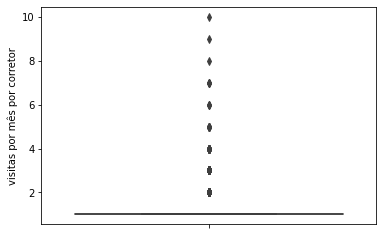

In [53]:
a = visit[visit.lead_type == 'Indireto'].groupby(['email','ano','mês']).count()['visit_date'].to_frame()
a.columns = ['visitas por mês por corretor']
sns.boxplot(y=a['visitas por mês por corretor'])

In [54]:
#Visitas diretas por mês em um único mês. Pessoa que fez mais visitas diretas em um único mês fez 15 visitas

visit[visit.lead_type == 'Direto'].groupby(['email','ano','mês']).count()['visit_date'].value_counts()

1     2583
2      242
3       33
4       11
5        3
7        3
6        1
8        1
14       1
15       1
Name: visit_date, dtype: int64

------
Visitas por mês de corretores:

média = 1.17

máximo = 10 (manuela.goncalves@email.com.br 10/2019), corretor autônomo, **não fez nenhuma venda no período analizado** apesar de todas essas visitas

-------

Visitas por mês sem corretor:

média = 1.14

máximo = 15

-----

In [185]:
#Quantos corretores fizeram ao menos uma visita no mês
v1 = visit[visit.lead_type == 'Indireto'].groupby(['ano-mês','email']).count()['visit_date'].count(level='ano-mês').to_frame()
v1.columns = ['corretores_c/_visita']

#Total de visitas feitas por corretores no mês
v2 = visit[visit.lead_type == 'Indireto'].groupby(['ano-mês']).count()['visit_date'].to_frame()
v2.columns = ['tot_visitas_corretores']

#Total de visitas feitas sem corretores no mês
v3 = visit[visit.lead_type == 'Direto'].groupby(['ano-mês']).count()['visit_date'].to_frame()
v3.columns = ['tot_visitas_diretas']

#Média de visitas feitas por corretores por mês
v4 = (v2['tot_visitas_corretores']/v1['corretores_c/_visita'])[:-1]

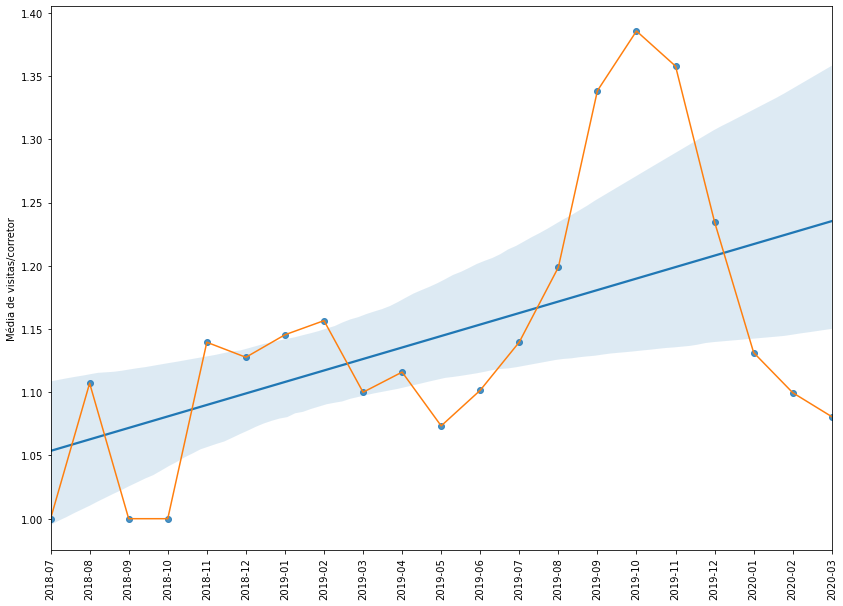

In [187]:
plt.figure(figsize=(14,10))
ticks=[*range(len(v4.index))]
a = sns.regplot(x=ticks,y=v4.values)
b = sns.lineplot(data=v4.values)
plt.xticks(ticks=ticks,labels=v4.index,rotation=90)
plt.ylabel('Média de visitas/corretor')
plt.show()

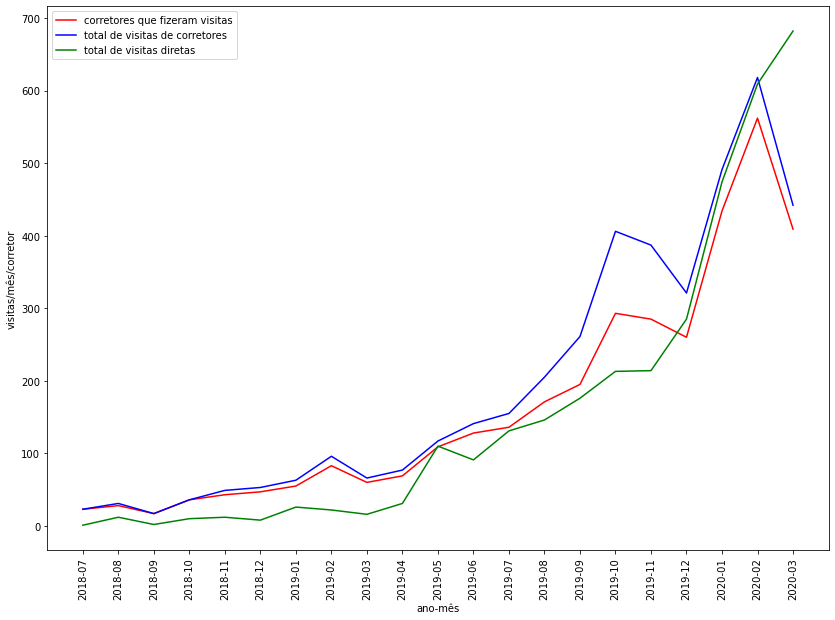

In [191]:
plt.figure(figsize=(14,10))
d1 = pd.Series(v1.iloc[:-1,0])
d2 = pd.Series(v2.iloc[:-1,0])
d3 = pd.Series(v3.iloc[:-1,0])
g = sns.lineplot(data=d1,color='red')
h = sns.lineplot(data=d2,color='blue')
i = sns.lineplot(data=d3,color='green')
plt.xticks(rotation=90)
plt.ylabel('visitas/mês/corretor')
plt.legend(['corretores que fizeram visitas','total de visitas de corretores','total de visitas diretas'])
plt.show()

------

**Média de visitas mensais/corretor apresenta tendência de crescimento no período**.

------

In [61]:
df.head()

,email,lead_id,lead_captured_date,lead_type,contact_type,business_type,leads_date,visit_date,sold_date
0,amanda.silva@email.com.br,00Q4P00000wkw5kUAA,2019-12-23 16:12:35,Direto,Comprador,Cliente Direto,2019-12-23,NaT,NaT
1,emilly.gomes@email.com.br,00Q4P00000wkxAqUAI,2019-12-26 12:00:53,Direto,Comprador,Cliente Direto,2019-12-26,2020-01-11,NaT
2,luiza.araujo@email.com.br,00Q4P00000wl1UJUAY,2020-01-03 11:40:38,Direto,Comprador,Cliente Direto,2020-01-03,2020-01-14,NaT
3,lucas.cavalcanti@email.com.br,00Q4P00000wl5ZjUAI,2020-01-07 09:41:50,Direto,Comprador,Cliente Direto,2020-01-07,NaT,NaT
4,lara.gomes@email.com.br,00Q4P00000wl6FNUAY,2020-01-07 13:40:46,Direto,Comprador,Cliente Direto,2020-01-07,NaT,NaT


In [62]:
sales = df[['email','lead_type','contact_type','business_type','sold_date']]
sales = sales.dropna()
sales['ano'] = sales['sold_date'].dt.year.astype(str)
sales['mês'] = sales['sold_date'].dt.month.astype(str)
sales['mês'] = sales['mês'].apply(lambda x: '{0:0>2}'.format(x))
sales['ano-mês'] = sales['ano']+'-'+sales['mês']
sales

,email,lead_type,contact_type,business_type,sold_date,ano,mês,ano-mês
157,joao.azevedo@email.com.br,Indireto,Corretor,Imobiliária Grande,2019-12-17,2019,12,2019-12
218,eduarda.santos@email.com.br,Indireto,Corretor,Imobiliária Pequena,2020-03-10,2020,03,2020-03
251,eduarda.souza@email.com.br,Indireto,Corretor,Imobiliária Grande,2020-03-02,2020,03,2020-03
400,luana.azevedo@email.com.br,Indireto,Corretor,Imobiliária Pequena,2020-04-02,2020,04,2020-04
637,otávio.almeida@email.com.br,Indireto,Corretor,Corretor Autônomo,2020-03-19,2020,03,2020-03
...,...,...,...,...,...,...,...,...
37564,sarah.dias@email.com.br,Direto,Comprador,Cliente Direto,2020-02-12,2020,02,2020-02
37711,sophia.cunha@email.com.br,Indireto,Corretor,Imobiliária Grande,2019-07-04,2019,07,2019-07
37713,gabriel.barros@email.com.br,Direto,Comprador,Cliente Direto,2019-07-31,2019,07,2019-07
37853,bruna.ferreira@email.com.br,Indireto,Corretor,Imobiliária Pequena,2019-11-11,2019,11,2019-11


In [63]:
#vendas por mês por vendedor
sales[sales.lead_type == 'Indireto'].groupby(['email']).count()['sold_date'].value_counts()

1    140
2     14
3      2
Name: sold_date, dtype: int64

In [64]:
#vendedores com mais vendas em um único mês (três vendas em um único mês)
sales[sales.lead_type == 'Indireto'].groupby(['email']).count()['sold_date'][sales[sales.lead_type == 'Indireto'].groupby(['email']).count()['sold_date'] == 3]

email
clara.costa@email.com.br        3
estevan.barbosa@email.com.br    3
Name: sold_date, dtype: int64

In [65]:
#dados dos vendedores com mais vendas em um único mês
df[df['email']=='estevan.barbosa@email.com.br'][df['lead_type'] == 'Indireto'].sort_values(['leads_date'])

<ipython-input-65-90e672e0228a>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['email']=='estevan.barbosa@email.com.br'][df['lead_type'] == 'Indireto'].sort_values(['leads_date'])


,email,lead_id,lead_captured_date,lead_type,contact_type,business_type,leads_date,visit_date,sold_date
15274,estevan.barbosa@email.com.br,171,2018-07-19 10:28:03,Indireto,Corretor,Permuta Imobiliária,2018-07-19,2018-07-21,2019-10-29
10925,estevan.barbosa@email.com.br,4260,2019-05-29 14:41:14,Indireto,Corretor,Imobiliária Pequena,2019-05-29,2019-05-30,2019-06-07
29505,estevan.barbosa@email.com.br,4955,2019-06-11 21:33:45,Indireto,Corretor,Imobiliária Pequena,2019-06-11,2019-06-14,2019-06-07
20732,estevan.barbosa@email.com.br,8401,2019-08-30 17:37:18,Indireto,Corretor,Imobiliária Pequena,2019-08-30,2019-09-01,NaT
12953,estevan.barbosa@email.com.br,9528,2019-09-17 10:07:25,Indireto,Corretor,Imobiliária Pequena,2019-09-17,2019-09-17,NaT
13483,estevan.barbosa@email.com.br,19822,2019-12-10 16:57:51,Indireto,Corretor,Imobiliária Pequena,2019-12-10,2019-12-11,NaT


------

**Corretores que mais vendem não são os que fazem mais visitas.** 

Exemplo: clara.costa@email.com.br e estevan.barbosa@email.com.br fizeram 3 vendas no período e fizeram 13 e 6 visitas respectivamente. 

murilo.goncalves@email.com.br fez 27 visitas e nenhuma venda no mesmo período.

-------

In [66]:
df.head()

,email,lead_id,lead_captured_date,lead_type,contact_type,business_type,leads_date,visit_date,sold_date
0,amanda.silva@email.com.br,00Q4P00000wkw5kUAA,2019-12-23 16:12:35,Direto,Comprador,Cliente Direto,2019-12-23,NaT,NaT
1,emilly.gomes@email.com.br,00Q4P00000wkxAqUAI,2019-12-26 12:00:53,Direto,Comprador,Cliente Direto,2019-12-26,2020-01-11,NaT
2,luiza.araujo@email.com.br,00Q4P00000wl1UJUAY,2020-01-03 11:40:38,Direto,Comprador,Cliente Direto,2020-01-03,2020-01-14,NaT
3,lucas.cavalcanti@email.com.br,00Q4P00000wl5ZjUAI,2020-01-07 09:41:50,Direto,Comprador,Cliente Direto,2020-01-07,NaT,NaT
4,lara.gomes@email.com.br,00Q4P00000wl6FNUAY,2020-01-07 13:40:46,Direto,Comprador,Cliente Direto,2020-01-07,NaT,NaT


In [67]:
leads = df[['email','lead_type','contact_type','business_type','lead_captured_date','leads_date']]
leads = leads.dropna()
leads['ano'] = leads['lead_captured_date'].dt.year.astype(str)
leads['mês'] = leads['lead_captured_date'].dt.month.astype(str)
leads['mês'] = leads['mês'].apply(lambda x: '{0:0>2}'.format(x))
leads['ano-mês'] = leads['ano']+'-'+leads['mês']
leads

,email,lead_type,contact_type,business_type,lead_captured_date,leads_date,ano,mês,ano-mês
0,amanda.silva@email.com.br,Direto,Comprador,Cliente Direto,2019-12-23 16:12:35,2019-12-23,2019,12,2019-12
1,emilly.gomes@email.com.br,Direto,Comprador,Cliente Direto,2019-12-26 12:00:53,2019-12-26,2019,12,2019-12
2,luiza.araujo@email.com.br,Direto,Comprador,Cliente Direto,2020-01-03 11:40:38,2020-01-03,2020,01,2020-01
3,lucas.cavalcanti@email.com.br,Direto,Comprador,Cliente Direto,2020-01-07 09:41:50,2020-01-07,2020,01,2020-01
4,lara.gomes@email.com.br,Direto,Comprador,Cliente Direto,2020-01-07 13:40:46,2020-01-07,2020,01,2020-01
...,...,...,...,...,...,...,...,...,...
38099,emilly.oliveira@email.com.br,Direto,Comprador,Cliente Direto,2018-12-19 18:35:31,2018-12-19,2018,12,2018-12
38100,guilherme.pinto@email.com.br,Direto,Comprador,Permuta Direto,2019-09-13 10:08:43,2019-09-13,2019,09,2019-09
38101,thiago.silva@email.com.br,Indireto,Corretor,MGM,2019-09-13 11:14:24,2019-09-13,2019,09,2019-09
38102,ana.martins@email.com.br,Direto,Comprador,Cliente Direto,2019-09-19 18:53:01,2019-09-19,2019,09,2019-09


In [193]:
#Quantos corretores trouxeram ao menos um lead no mês
w1 = leads[leads.lead_type == 'Indireto'].groupby(['ano-mês','email']).count()['leads_date'].count(level='ano-mês').to_frame()
w1.columns = ['corretores_c/_leads']

#Total de leads por corretores no mês
w2 = leads[leads.lead_type == 'Indireto'].groupby(['ano-mês']).count()['leads_date'].to_frame()
w2.columns = ['tot_leads_corretores']

#Total de leads diretos no mês
w3 = leads[leads.lead_type == 'Direto'].groupby(['ano-mês']).count()['leads_date'].to_frame()
w3.columns = ['tot_leads_diretos']

#Média de leads por corretores por mês
w4 = (w2['tot_leads_corretores']/w1['corretores_c/_leads'])[:-1]

In [194]:
w4

ano-mês
2018-07    1.000000
2018-08    1.080000
2018-09    1.000000
2018-10    1.022222
2018-11    1.200000
2018-12    1.080000
2019-01    1.159420
2019-02    1.170213
2019-03    1.067568
2019-04    1.134146
2019-05    1.163121
2019-06    1.084507
2019-07    1.366667
2019-08    1.463878
2019-09    1.563467
2019-10    1.426991
2019-11    1.361478
2019-12    1.302326
2020-01    1.551880
2020-02    1.281711
2020-03    1.179153
dtype: float64

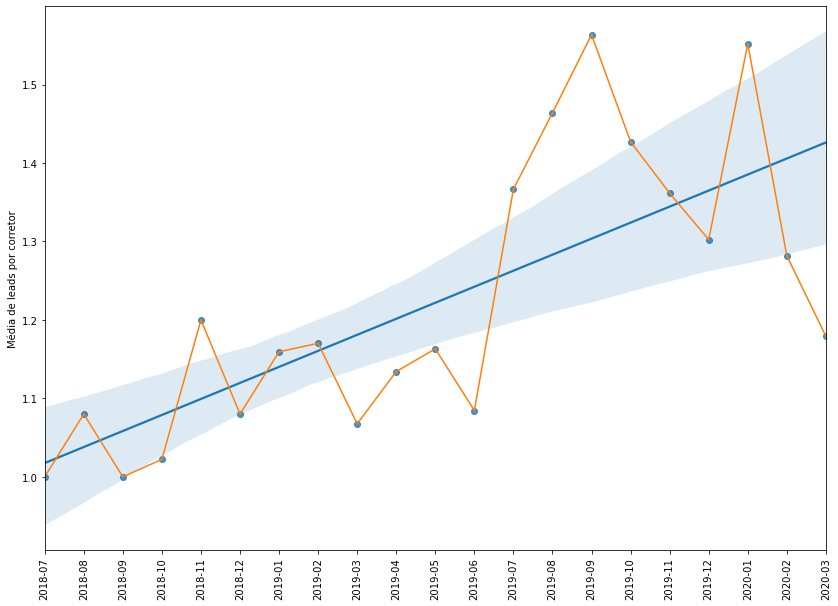

In [523]:
plt.figure(figsize=(14,10))
ticks=[*range(len(w4.index))]
a = sns.regplot(x=ticks,y=w4.values)
b = sns.lineplot(data=w4.values)
plt.xticks(ticks=ticks,labels=w4.index,rotation=90)
plt.ylabel('Média de leads por corretor')
plt.show()

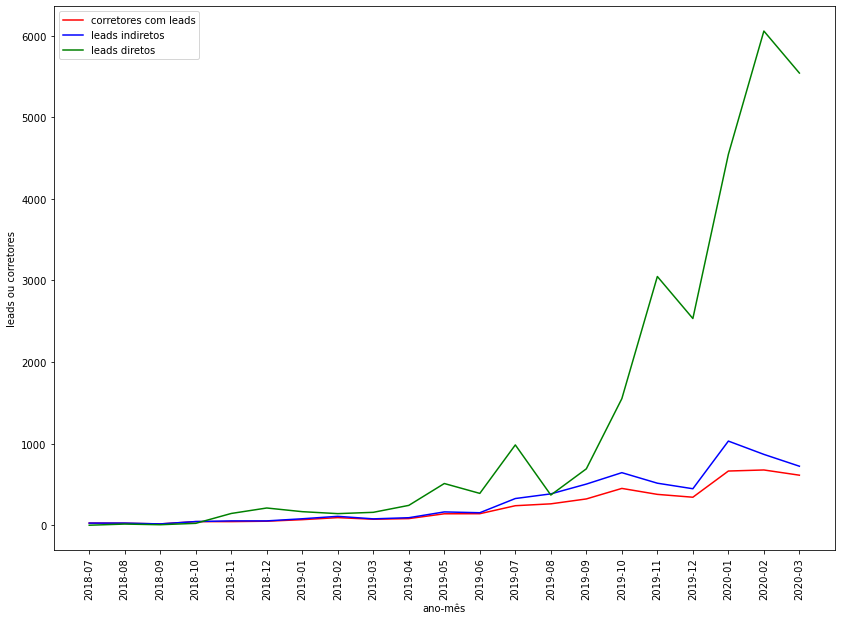

In [192]:
plt.figure(figsize=(14,10))
d1 = pd.Series(w1.iloc[:-1,0])
d2 = pd.Series(w2.iloc[:-1,0])
d3 = pd.Series(w3.iloc[:-1,0])
g = sns.lineplot(data=d1,color='red')
h = sns.lineplot(data=d2,color='blue')
i = sns.lineplot(data=d3,color='green')
plt.xticks(rotation=90)
plt.ylabel('leads ou corretores')
plt.legend(['corretores com leads','leads indiretos','leads diretos'])
plt.show()

-----

**Média de leads mensais/corretor apresenta tendência de crescimento no período**.

------

In [71]:
#Leads por corretores por mês em um único mês. Corretor com mais leads tinha 22 leads em um único mês
leads[leads.lead_type == 'Indireto'].groupby(['email','ano','mês']).count()['leads_date'].value_counts()

1     4167
2      611
3      177
4       74
5       36
7        9
6        8
8        6
12       3
9        3
10       3
13       1
17       1
14       1
22       1
11       1
Name: leads_date, dtype: int64

In [72]:
#Corretor com mais leads em um único mês (22)
leads[leads.lead_type == 'Indireto'].groupby(['email','ano','mês']).count()['leads_date'][leads[leads.lead_type == 'Indireto'].groupby(['email','ano','mês']).count()['leads_date'] == 22]

email                     ano   mês
josé.castro@email.com.br  2019  11     22
Name: leads_date, dtype: int64

In [73]:
#Dados corretor com mais leads em um único mês (22)
df[df['email']=='josé.castro@email.com.br'][df['lead_type'] == 'Indireto'].sort_values(['leads_date'])

<ipython-input-73-2323d41df9c2>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['email']=='josé.castro@email.com.br'][df['lead_type'] == 'Indireto'].sort_values(['leads_date'])


,email,lead_id,lead_captured_date,lead_type,contact_type,business_type,leads_date,visit_date,sold_date
19221,josé.castro@email.com.br,7806,2019-08-16 18:37:31,Indireto,Corretor,Corretor Autônomo,2019-08-16,NaT,NaT
948,josé.castro@email.com.br,7972,2019-08-21 11:25:08,Indireto,Corretor,Corretor Autônomo,2019-08-21,NaT,NaT
21554,josé.castro@email.com.br,8265,2019-08-27 16:58:20,Indireto,Corretor,Corretor Autônomo,2019-08-27,NaT,NaT
322,josé.castro@email.com.br,13835,2019-10-31 15:36:46,Indireto,Corretor,Corretor Autônomo,2019-10-31,NaT,NaT
35107,josé.castro@email.com.br,13979,2019-11-01 17:03:00,Indireto,Corretor,Corretor Autônomo,2019-11-01,NaT,NaT
30417,josé.castro@email.com.br,13980,2019-11-01 17:03:55,Indireto,Corretor,Corretor Autônomo,2019-11-01,NaT,NaT
4221,josé.castro@email.com.br,13970,2019-11-01 15:24:27,Indireto,Corretor,Corretor Autônomo,2019-11-01,NaT,NaT
22539,josé.castro@email.com.br,14322,2019-11-04 19:09:42,Indireto,Corretor,Permuta Corretores,2019-11-04,NaT,NaT
7559,josé.castro@email.com.br,14258,2019-11-04 11:25:10,Indireto,Corretor,Corretor Autônomo,2019-11-04,NaT,NaT
29086,josé.castro@email.com.br,14415,2019-11-05 15:16:13,Indireto,Corretor,Corretor Autônomo,2019-11-05,NaT,NaT


In [74]:
#leads diretos por mês. Um lead direto apareceu 59 vezes em um único mês
leads[leads.lead_type == 'Direto'].groupby(['email','ano','mês']).count()['leads_date'].value_counts()

1     11516
2      4236
3      1871
4       708
5       283
6        93
7        46
8        26
10        9
9         8
12        2
11        2
14        1
13        1
44        1
24        1
59        1
25        1
17        1
21        1
15        1
Name: leads_date, dtype: int64

In [75]:
#Total de leads direto por mês
leads[leads.lead_type == 'Direto'].groupby(['ano','mês']).count()['leads_date']

ano   mês
2018  07        1
      08       15
      09        7
      10       24
      11      145
      12      212
2019  01      167
      02      143
      03      159
      04      244
      05      512
      06      391
      07      985
      08      371
      09      692
      10     1552
      11     3049
      12     2534
2020  01     4546
      02     6057
      03     5542
      04     4028
Name: leads_date, dtype: int64

In [76]:
#Pessoa com mais acessos diretos
leads[leads.lead_type == 'Direto'].groupby(['email','ano','mês']).count()['leads_date'][leads[leads.lead_type == 'Direto'].groupby(['email','ano','mês']).count()['leads_date'] == 59]

email                     ano   mês
josé.castro@email.com.br  2019  11     59
Name: leads_date, dtype: int64

In [77]:
#Dados da pessoa com mais acessos diretos
df[df['email']=='josé.castro@email.com.br'][df['lead_type'] == 'Direto'].sort_values(['leads_date'])

<ipython-input-77-2182f482757d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['email']=='josé.castro@email.com.br'][df['lead_type'] == 'Direto'].sort_values(['leads_date'])


,email,lead_id,lead_captured_date,lead_type,contact_type,business_type,leads_date,visit_date,sold_date
27749,josé.castro@email.com.br,1432,2019-02-18 16:50:24,Direto,Comprador,Cliente Direto,2019-02-18,NaT,NaT
33848,josé.castro@email.com.br,7857,2019-08-19 09:29:45,Direto,Comprador,Cliente Direto,2019-08-19,NaT,NaT
16499,josé.castro@email.com.br,7991,2019-08-21 14:35:04,Direto,Comprador,Cliente Direto,2019-08-21,NaT,NaT
15108,josé.castro@email.com.br,8022,2019-08-22 03:34:44,Direto,Comprador,Cliente Direto,2019-08-22,NaT,NaT
4460,josé.castro@email.com.br,8685,2019-09-04 10:23:04,Direto,Comprador,Cliente Direto,2019-09-04,NaT,NaT
...,...,...,...,...,...,...,...,...,...
24226,josé.castro@email.com.br,20540,2019-12-12 19:34:12,Direto,Comprador,Cliente Direto,2019-12-12,NaT,NaT
170,josé.castro@email.com.br,21177,2019-12-16 12:01:00,Direto,Comprador,Cliente Direto,2019-12-16,NaT,NaT
32912,josé.castro@email.com.br,21264,2019-12-16 16:56:44,Direto,Comprador,Cliente Direto,2019-12-16,NaT,NaT
798,josé.castro@email.com.br,00Q4P000010MP5TUAW,2020-01-31 13:32:20,Direto,Comprador,Cliente Direto,2020-01-31,NaT,NaT


------
Leads por mês de corretores:

média = 1.32

máximo em um único mês corretor = 22 (josé.castro@email.com.br 11/2019), corretor autônomo, **não fez nenhuma venda no período analizado e apenas 2 visitas**

máximo = 1032 (01-2020)

-------

leads por mês sem corretor:

máximo em um único mês = 6057 (03-2020)

-----

2473 corretores cadastrados na base

1770 fizeram alguma movimentação em 2020

média de leads diretos em 2020 foi de 5043

**Significa que, dividindo igualmente, seriam 2 leads/mês para cada corretor cadastrado na base ou 2.8 leads/mês para os corretores 'ativos' em 2020**.

-------

In [78]:
# Quantidade de corretores que trouxeram ao menos um lead em 2020
leads[leads['lead_type'] == 'Indireto'][leads['ano']=='2020']['email'].nunique()

<ipython-input-78-5bd2c87e6fbc>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  leads[leads['lead_type'] == 'Indireto'][leads['ano']=='2020']['email'].nunique()


1770

In [79]:
# Quantidade de média de leads diretos por mês em 2020
leads[leads['lead_type'] == 'Direto'][leads['ano']=='2020']['mês'].value_counts().mean()

<ipython-input-79-d0bbec962fba>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  leads[leads['lead_type'] == 'Direto'][leads['ano']=='2020']['mês'].value_counts().mean()


5043.25

In [80]:
sales.sort_values(['ano-mês'])

,email,lead_type,contact_type,business_type,sold_date,ano,mês,ano-mês
1923,julieta.barros@email.com.br,Indireto,Corretor,Imobiliária Pequena,2018-11-10,2018,11,2018-11
5042,isabella.costa@email.com.br,Indireto,Corretor,Corretor Autônomo,2018-11-30,2018,11,2018-11
32545,rodrigo.azevedo@email.com.br,Indireto,Corretor,Imobiliária Grande,2018-12-24,2018,12,2018-12
7588,danilo.melo@email.com.br,Direto,Comprador,Cliente Direto,2018-12-15,2018,12,2018-12
1730,sofia.goncalves@email.com.br,Indireto,Corretor,Corretor Autônomo,2018-12-08,2018,12,2018-12
...,...,...,...,...,...,...,...,...
21891,thiago.lima@email.com.br,Indireto,Corretor,Corretor Autônomo,2020-04-01,2020,04,2020-04
6803,tiago.carvalho@email.com.br,Indireto,Corretor,Corretor Autônomo,2020-04-01,2020,04,2020-04
3967,cauã.castro@email.com.br,Direto,Comprador,Cliente Direto,2020-04-01,2020,04,2020-04
35731,giovana.castro@email.com.br,Direto,Comprador,Cliente Direto,2020-04-22,2020,04,2020-04


In [196]:
#Quantos corretores fizeram ao menos uma venda no mês
z1 = sales[sales.lead_type == 'Indireto'].groupby(['ano-mês','email']).count()['sold_date'].count(level='ano-mês').to_frame()
z1.columns = ['corretores_c/_vendas']

#Total de vendas por corretores no mês
z2 = sales[sales.lead_type == 'Indireto'].groupby(['ano-mês']).count()['sold_date'].to_frame()
z2.columns = ['tot_vendas_corretores']

#Total de vendas diretos no mês
z3 = sales[sales.lead_type == 'Direto'].groupby(['ano-mês']).count()['sold_date'].to_frame()
z3.columns = ['tot_vendas_diretos']

#Média de vendas por corretores por mês
z4 = (z2['tot_vendas_corretores']/z1['corretores_c/_vendas'])[:-1]

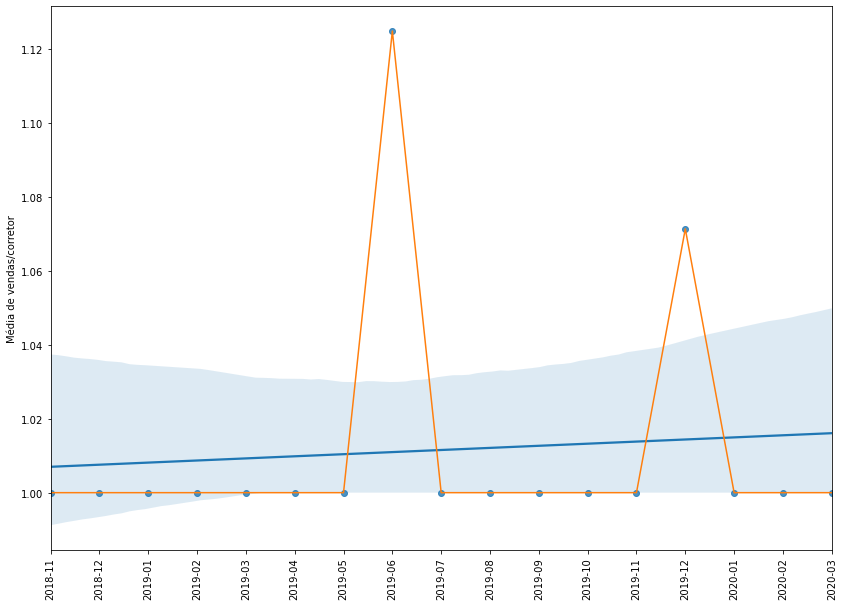

In [197]:
plt.figure(figsize=(14,10))
ticks=[*range(len(z4.index))]
a = sns.regplot(x=ticks,y=z4.values)
b = sns.lineplot(data=z4.values)
plt.xticks(ticks=ticks,labels=z4.index,rotation=90)
plt.ylabel('Média de vendas/corretor')
plt.show()

-----

**Média de vendas mensais/corretor apresenta tendência BEM leve de crescimento no período**.

------

# Conversão

In [173]:
#Conversão média dos corretores de leads em vendas por mês em %
conv_in_m = (z2['tot_vendas_corretores']/w2['tot_leads_corretores'])[4:-1]*100
conv_in_m

ano-mês
2018-11    3.703704
2018-12    3.703704
2019-01    5.000000
2019-02    0.909091
2019-03    5.063291
2019-04    3.225806
2019-05    3.048780
2019-06    5.844156
2019-07    2.743902
2019-08    2.077922
2019-09    2.772277
2019-10    3.720930
2019-11    1.744186
2019-12    3.348214
2020-01    1.647287
2020-02    2.186421
2020-03    3.314917
dtype: float64

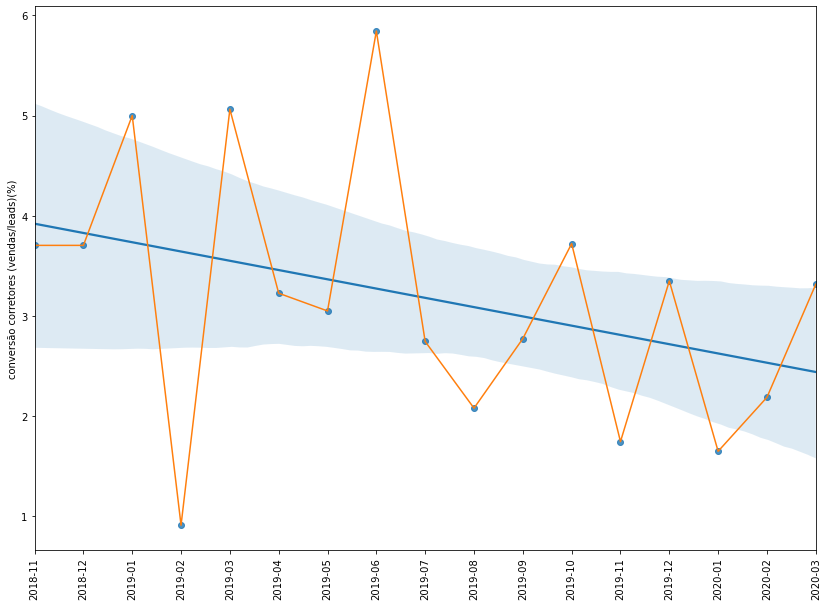

In [174]:
#Conversão média dos corretores de leads em vendas por mês em %
plt.figure(figsize=(14,10))
ticks=[*range(len(conv_in_m.index))]
a = sns.regplot(x=ticks,y=conv_in_m.values)
b = sns.lineplot(data=conv_in_m.values)
plt.xticks(ticks=ticks,labels=conv_in_m.index,rotation=90)
plt.ylabel('conversão corretores (vendas/leads)(%)')
plt.show()

In [171]:
#Conversão média direta de leads em vendas por mês em %
conv_d_m = (z3['tot_vendas_diretos']/w3['tot_leads_diretos'])[5:-1]*100
conv_d_m

ano-mês
2018-12    0.471698
2019-01    0.598802
2019-02    0.699301
2019-03    0.628931
2019-04    0.409836
2019-05    1.171875
2019-06    0.255754
2019-07    0.812183
2019-08    2.156334
2019-09    1.300578
2019-10    0.451031
2019-11    0.590357
2019-12    0.513023
2020-01    0.263968
2020-02    0.132079
2020-03    0.216528
dtype: float64

-----

**Conversão de leads em vendas mensais/corretor apresenta tendência de queda no período**.

------

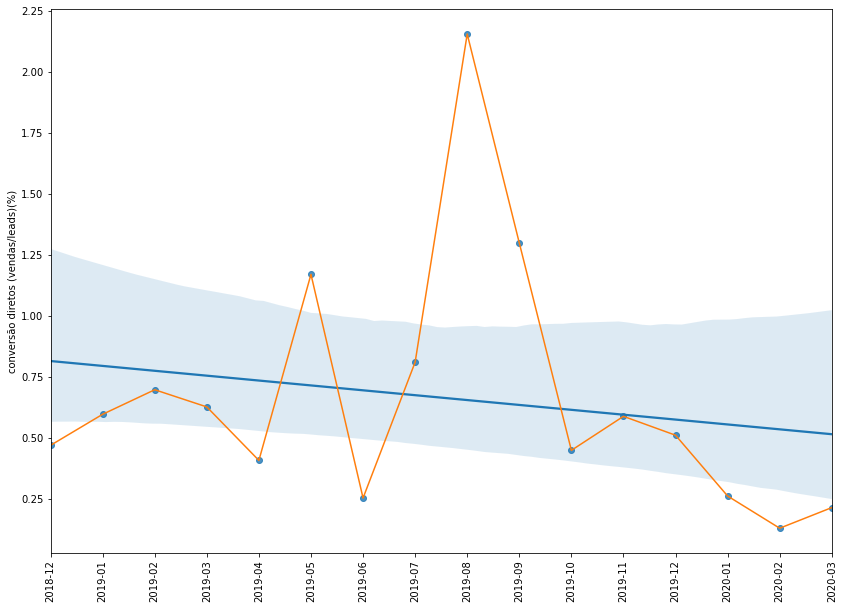

In [172]:
#Conversão média direta de leads em vendas por mês em %
plt.figure(figsize=(14,10))
ticks=[*range(len(conv_d_m.index))]
a = sns.regplot(x=ticks,y=conv_d_m.values)
b = sns.lineplot(data=conv_d_m.values)
plt.xticks(ticks=ticks,labels=conv_d_m.index,rotation=90)
plt.ylabel('conversão diretos (vendas/leads)(%)')
plt.show()

-----

**Conversão de leads em vendas mensais dos leads diretos apresenta tendência de queda bem menos acentuada no período**.

------

In [169]:
#Conversão média dos corretores de visitas em vendas por mês em %
conv_in_mv = (z2['tot_vendas_corretores']/v2['tot_visitas_corretores'])[4:-1]*100
conv_in_mv

ano-mês
2018-11    4.081633
2018-12    3.773585
2019-01    6.349206
2019-02    1.041667
2019-03    6.060606
2019-04    3.896104
2019-05    4.273504
2019-06    6.382979
2019-07    5.806452
2019-08    3.902439
2019-09    5.363985
2019-10    5.911330
2019-11    2.325581
2019-12    4.672897
2020-01    3.462322
2020-02    3.074434
2020-03    5.429864
dtype: float64

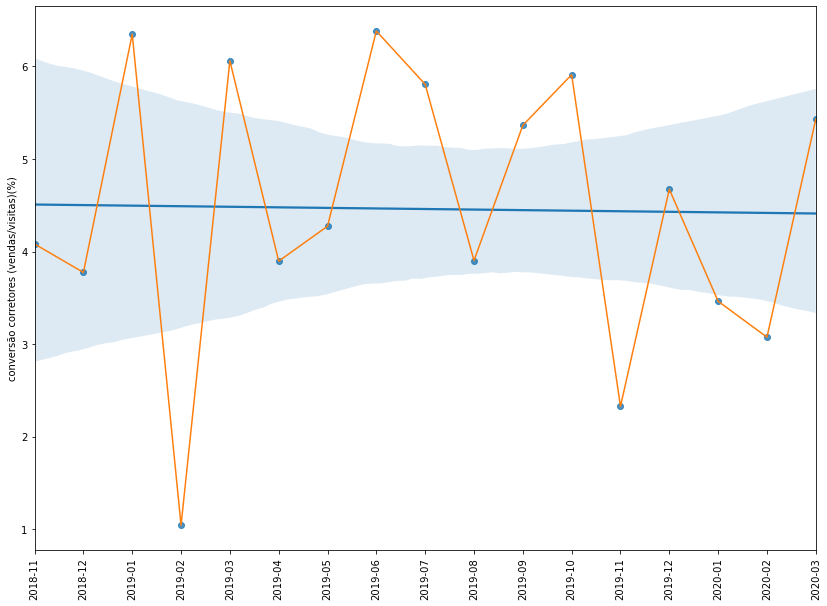

In [170]:
#Conversão média dos corretores de visitas em vendas por mês em %
plt.figure(figsize=(14,10))
ticks=[*range(len(conv_in_mv.index))]
a = sns.regplot(x=ticks,y=conv_in_mv.values)
b = sns.lineplot(data=conv_in_mv.values)
plt.xticks(ticks=ticks,labels=conv_in_mv.index,rotation=90)
plt.ylabel('conversão corretores (vendas/visitas)(%)')
plt.show()

-----

**Conversão de visitas em vendas mensais/corretor se manteve estável no período**.

------

In [181]:
#Conversão média direta de visitas em vendas por mês em %
conv_d_mv = (z3['tot_vendas_diretos']/v3['tot_visitas_diretas'])[5:-1]*100
conv_d_mv

ano-mês
2018-12    12.500000
2019-01     3.846154
2019-02     4.545455
2019-03     6.250000
2019-04     3.225806
2019-05     5.454545
2019-06     1.098901
2019-07     6.106870
2019-08     5.479452
2019-09     5.113636
2019-10     3.286385
2019-11     8.411215
2019-12     4.561404
2020-01     2.531646
2020-02     1.313629
2020-03     1.759531
dtype: float64

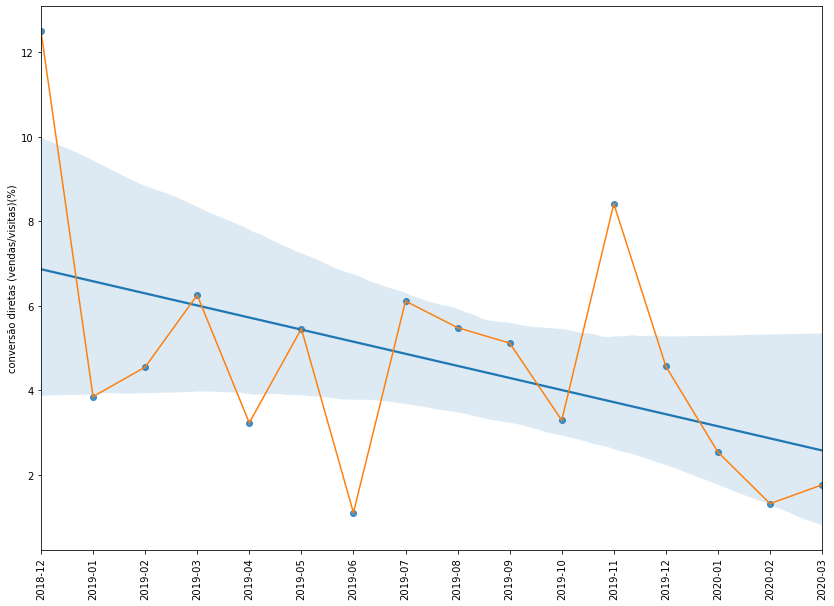

In [183]:
#Conversão média direta de visitas em vendas por mês em %
plt.figure(figsize=(14,10))
ticks=[*range(len(conv_d_mv.index))]
a = sns.regplot(x=ticks,y=conv_d_mv.values)
b = sns.lineplot(data=conv_d_mv.values)
plt.xticks(ticks=ticks,labels=conv_d_mv.index,rotation=90)
plt.ylabel('conversão diretas (vendas/visitas)(%)')
plt.show()

-----

**Conversão de visitas em vendas mensaisdos leads diretos forte apresenta tendência de queda no período**.

------

-----

Verifica-se ainda que os corretores convertem mais que no caso dos leads diretos. Logo, ideia inicial da Gerência de alocar os leads diretos para os corretores pode ter um impacto significativo nas vendas. 

**Destaca-se que fato da conversão dos corretores estar caindo em ritmo mais acentuado é um sponto de atenção que exige monitoramento**. No entanto, o fato dos leads diretos terem crescido muito mais que os leads inderetos em termos absolutos pode ser o que está fazendo a conversão dos leads diretos cair de forma menos acentuada. Um aumento dos leads para os corretores (passar os leads diretos para os corretores) pode sim resultar numa redução ou até na reversão dessa tendência de queda na conversão. 

------

# Ranking vendedores

In [315]:
leads.head()

,email,lead_type,contact_type,business_type,lead_captured_date,leads_date,ano,mês,ano-mês
0,amanda.silva@email.com.br,Direto,Comprador,Cliente Direto,2019-12-23 16:12:35,2019-12-23,2019,12,2019-12
1,emilly.gomes@email.com.br,Direto,Comprador,Cliente Direto,2019-12-26 12:00:53,2019-12-26,2019,12,2019-12
2,luiza.araujo@email.com.br,Direto,Comprador,Cliente Direto,2020-01-03 11:40:38,2020-01-03,2020,01,2020-01
3,lucas.cavalcanti@email.com.br,Direto,Comprador,Cliente Direto,2020-01-07 09:41:50,2020-01-07,2020,01,2020-01
4,lara.gomes@email.com.br,Direto,Comprador,Cliente Direto,2020-01-07 13:40:46,2020-01-07,2020,01,2020-01


In [350]:
#Calcular conversão por corretor
leads_c = leads[leads.lead_type == 'Indireto'].groupby(['email']).count()['leads_date'].to_frame()
visits_c = visit[visit.lead_type == 'Indireto'].groupby(['email']).count()['visit_date'].to_frame()
sales_c = sales[sales.lead_type == 'Indireto'].groupby(['email']).count()['sold_date'].to_frame()

conv_c = leads_c.join(visits_c)
conv_c = conv_c.join(sales_c)

conv_c['visit_date'] = conv_c['visit_date'].fillna(0)
conv_c['sold_date'] = conv_c['sold_date'].fillna(0)

conv_c['conv_l_to_v'] = conv_c['visit_date']/conv_c['leads_date']
conv_c['conv_l_to_s'] = conv_c['sold_date']/conv_c['leads_date']
conv_c['conv_v_to_s'] = conv_c['sold_date']/conv_c['visit_date']
conv_c['conv_v_to_s'] = conv_c['conv_v_to_s'].fillna(0)

conv_c.columns = ['leads', 'visits', 'sales', 'conv_l_to_v', 'conv_l_to_s',
       'conv_v_to_s']

conv_c

,leads,visits,sales,conv_l_to_v,conv_l_to_s,conv_v_to_s
email,,,,,,
alex.almeida@email.com.br,2,1.0,0.0,0.500000,0.0,0.0
alex.azevedo@email.com.br,1,1.0,0.0,1.000000,0.0,0.0
alex.barbosa@email.com.br,1,1.0,0.0,1.000000,0.0,0.0
alex.correia@email.com.br,1,0.0,0.0,0.000000,0.0,0.0
alex.cunha@email.com.br,7,1.0,0.0,0.142857,0.0,0.0
...,...,...,...,...,...,...
ágatha.rodrigues@email.com.br,2,2.0,0.0,1.000000,0.0,0.0
ágatha.santos@email.com.br,2,0.0,0.0,0.000000,0.0,0.0
ágatha.silva@email.com.br,2,1.0,0.0,0.500000,0.0,0.0


In [522]:
conv_c['leads'].mean()

2.7193691872219974

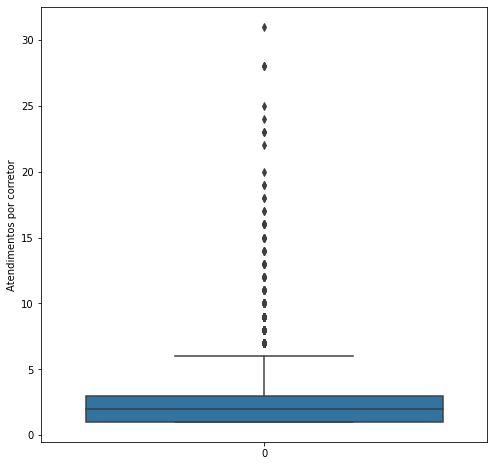

In [521]:
#Atendimentos por corretor no período
plt.figure(figsize=(8,8))
a = conv_c['leads']
sns.boxplot(data=a)
plt.ylabel('Atendimentos por corretor')
plt.show()

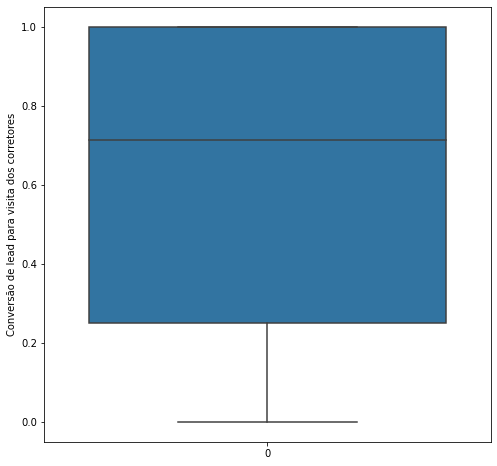

In [520]:
#Conversão de lead para visita
plt.figure(figsize=(8,8))
a = conv_c['conv_l_to_v']
sns.boxplot(data=a)
plt.ylabel('Conversão de lead para visita dos corretores')
plt.show()

In [353]:
#Conversão de lead para venda
conv_c['conv_l_to_s'].value_counts()

0.000000    2317
0.500000      29
1.000000      28
0.250000      18
0.333333      17
0.200000      15
0.111111      11
0.100000       6
0.125000       5
0.043478       3
0.083333       3
0.181818       2
0.666667       2
0.142857       2
0.090909       2
0.071429       2
0.285714       2
0.066667       1
0.230769       1
0.058824       1
0.400000       1
0.052632       1
0.153846       1
0.133333       1
0.045455       1
0.166667       1
Name: conv_l_to_s, dtype: int64

In [355]:
#Conversão de visita para venda
conv_c['conv_v_to_s'].value_counts()

0.000000    2317
1.000000      40
0.500000      36
0.333333      19
0.250000      12
0.125000       7
0.166667       7
0.200000       6
0.100000       5
0.142857       5
0.111111       4
0.666667       3
0.222222       2
0.400000       2
0.052632       1
0.272727       1
0.083333       1
0.076923       1
0.066667       1
0.095238       1
0.090909       1
0.181818       1
Name: conv_v_to_s, dtype: int64

In [373]:
pd.set_option('display.max_rows', 100)
conv_c.sort_values(['sales','conv_v_to_s','conv_l_to_s'],ascending=False).head(100)

,leads,visits,sales,conv_l_to_v,conv_l_to_s,conv_v_to_s
email,,,,,,
estevan.barbosa@email.com.br,6,6.0,3.0,1.000000,0.500000,0.500000
clara.costa@email.com.br,13,11.0,3.0,0.846154,0.230769,0.272727
isabela.ferreira@email.com.br,2,2.0,2.0,1.000000,1.000000,1.000000
leonor.pinto@email.com.br,3,3.0,2.0,1.000000,0.666667,0.666667
rafael.fernandes@email.com.br,3,3.0,2.0,1.000000,0.666667,0.666667
isabella.barbosa@email.com.br,5,3.0,2.0,0.600000,0.400000,0.666667
caio.barros@email.com.br,7,5.0,2.0,0.714286,0.285714,0.400000
rodrigo.azevedo@email.com.br,7,5.0,2.0,0.714286,0.285714,0.400000
erick.ribeiro@email.com.br,6,6.0,2.0,1.000000,0.333333,0.333333


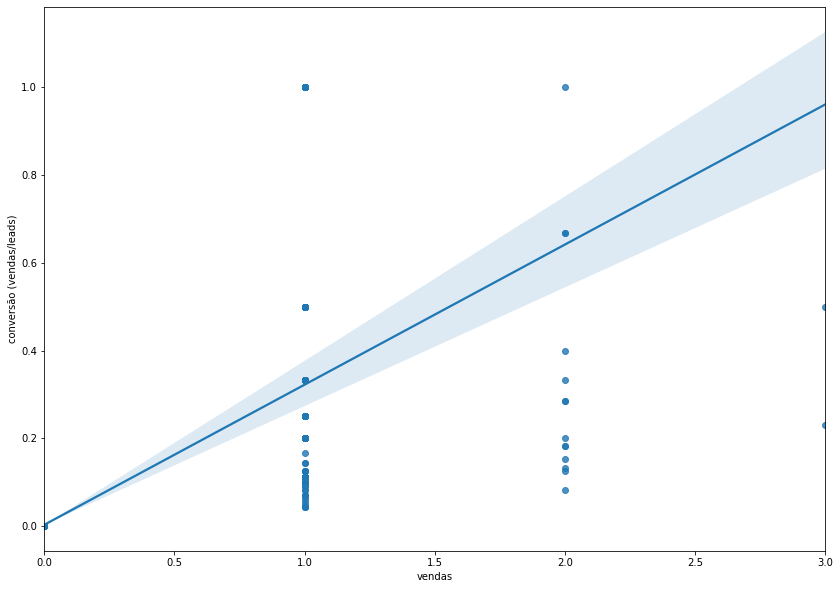

In [508]:
plt.figure(figsize=(14,10))
sns.regplot(x=conv_c.sales,y=conv_c.conv_l_to_s)
plt.ylabel('conversão (vendas/leads)')
plt.xlabel('vendas')
plt.show()

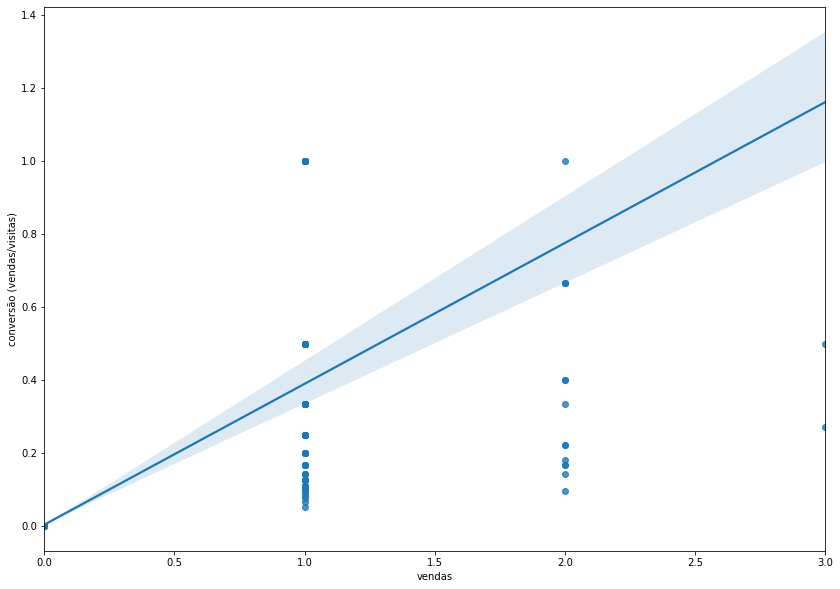

In [509]:
plt.figure(figsize=(14,10))
sns.regplot(x=conv_c.sales,y=conv_c.conv_v_to_s)
plt.ylabel('conversão (vendas/visitas)')
plt.xlabel('vendas')
plt.show()

-----

**Há forte correlação positiva entre a conversão de leads em vendas e de visitas em vendas com as vendas**. Neste caso, dar mais leads para os corretores que convertem mais é o mesmo que dar mais leads para os corretores que vendem mais. 

**Logo, ambas as hipóteses se confirmam.** 

**Recomenda-se como métricas para distribuir os leads diretos o ranking dos corretores em termos de conversão e vendas**. Ambos as métricas devem ser acompanhadas, pois pode haver descolamento entre elas ao longo do tempo. Além disso, ambas são importantes, pois pode haver corretores que convertem muito, mas vendem pouco e vice-versa. 

Outros fatores podem ser levados em consideração para qualificar melhor essas métricas. Por exemplo, dar mais peso para corretores que vendem e/ou convertem mais em regiões/bairros em que é mais difícil vender apartamentos. 

------

# Vendedores para atender a demanda

In [525]:
from sklearn.linear_model import LinearRegression

In [535]:
leads

,email,lead_type,contact_type,business_type,lead_captured_date,leads_date,ano,mês,ano-mês
0,amanda.silva@email.com.br,Direto,Comprador,Cliente Direto,2019-12-23 16:12:35,2019-12-23,2019,12,2019-12
1,emilly.gomes@email.com.br,Direto,Comprador,Cliente Direto,2019-12-26 12:00:53,2019-12-26,2019,12,2019-12
2,luiza.araujo@email.com.br,Direto,Comprador,Cliente Direto,2020-01-03 11:40:38,2020-01-03,2020,01,2020-01
3,lucas.cavalcanti@email.com.br,Direto,Comprador,Cliente Direto,2020-01-07 09:41:50,2020-01-07,2020,01,2020-01
4,lara.gomes@email.com.br,Direto,Comprador,Cliente Direto,2020-01-07 13:40:46,2020-01-07,2020,01,2020-01
...,...,...,...,...,...,...,...,...,...
38099,emilly.oliveira@email.com.br,Direto,Comprador,Cliente Direto,2018-12-19 18:35:31,2018-12-19,2018,12,2018-12
38100,guilherme.pinto@email.com.br,Direto,Comprador,Permuta Direto,2019-09-13 10:08:43,2019-09-13,2019,09,2019-09
38101,thiago.silva@email.com.br,Indireto,Corretor,MGM,2019-09-13 11:14:24,2019-09-13,2019,09,2019-09
38102,ana.martins@email.com.br,Direto,Comprador,Cliente Direto,2019-09-19 18:53:01,2019-09-19,2019,09,2019-09


In [652]:
atendimento = w4.to_frame().reset_index()
atendimento.columns = ['ano-mês','conversão']
atendimento['ano-mês'] = pd.to_datetime(atendimento['ano-mês'])
X = (atendimento['ano-mês'] - atendimento['ano-mês'][0]).dt.days.values.reshape(-1, 1)
y = atendimento['conversão']

In [653]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [654]:
X_pred = ['2020-04','2020-05']
X_pred = pd.Series(X_pred).to_frame()
X_pred = pd.to_datetime(X_pred.iloc[:,0])
X_pred = (X_pred - atendimento['ano-mês'][0]).dt.days.values.reshape(-1, 1)

In [655]:
y_pred_conv = model.predict(X_pred)
y_pred_conv

array([1.44683713, 1.46698567])

In [656]:
leads_dir = w3.reset_index().copy()
leads_dir.columns = ['ano-mês','leads_diretos']
leads_dir['ano-mês'] = pd.to_datetime(leads_dir['ano-mês'])
X = (leads_dir['ano-mês'] - leads_dir['ano-mês'][0]).dt.days.values.reshape(-1, 1)
y = leads_dir['leads_diretos']

In [658]:
model.fit(X,y)
y_pred_leads_dir = model.predict(X_pred)
y_pred_leads_dir

array([4049.85808811, 4296.00255693])

In [660]:
leads_dir = w2.reset_index().copy()
leads_dir.columns = ['ano-mês','leads_indiretos']
leads_dir['ano-mês'] = pd.to_datetime(leads_dir['ano-mês'])
X = (leads_dir['ano-mês'] - leads_dir['ano-mês'][0]).dt.days.values.reshape(-1, 1)
y = leads_dir['leads_indiretos']

In [661]:
model.fit(X,y)
y_pred_leads_in = model.predict(X_pred)
y_pred_leads_in

array([720.8646594 , 759.81571487])

In [664]:
corretores = (y_pred_leads_in + y_pred_leads_dir)/y_pred_conv
corretores

array([3297.34608832, 3446.39922671])

-----

Supondo uma variação linear do fluxo de leads diretos e indiretos e que a média de leads por corretores também siga uma tendência linear, **verifica-se que seriam necessários 3297 corretores para atender a demanda em abril/2020 e 3446 para atender a demanda em maio/2020.** 

Visto que há 2473 corretores cadastrados na base e apenas 1770 que fizeram alguma movimentação em 2020, caso se mantenha a mesma média de leads por corretores, seria necessários quase 1000 corretores a mais. Alternativamente, é mais fácil distribuir mais leads pelos corretores cadastrados, conforme indicado anteriormente.

------